In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics


In [62]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\BI\\CApstone\\health care diabetes.csv')

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
ones = df[df['Outcome']==1]
ones.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


### Visually explore Glucose, BloodPressure, SkinThickness, Insulin, BMI variables using histograms

In [69]:
df['Glucose'].value_counts().head()

99     17
100    17
129    14
125    14
106    14
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

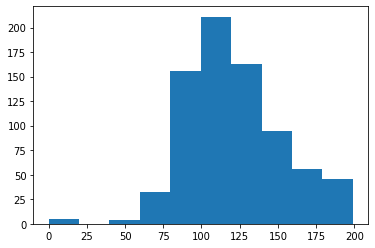

In [70]:
plt.hist(df['Glucose'])

In [71]:
df['BloodPressure'].value_counts().head()

70    57
74    52
78    45
68    45
72    44
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

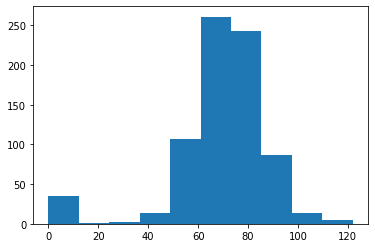

In [72]:
plt.hist(df['BloodPressure'])

In [73]:
df['SkinThickness'].value_counts().head()

0     227
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

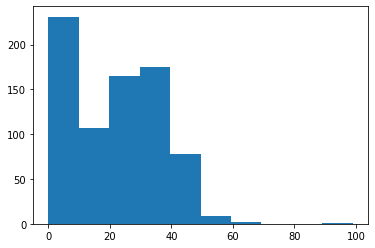

In [74]:
plt.hist(df['SkinThickness'])

In [75]:
df['Insulin'].value_counts().head()

0      374
105     11
140      9
130      9
120      8
Name: Insulin, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

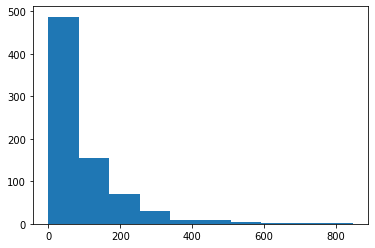

In [76]:
plt.hist(df['Insulin'])

In [77]:
df['BMI'].value_counts().head()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

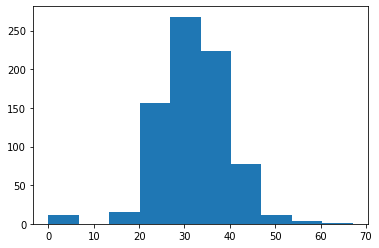

In [78]:
plt.hist(df['BMI'])

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [79]:
BloodPressure = df['BloodPressure']
Glucose = df['Glucose']
SkinThickness = df['SkinThickness']
Insulin = df['Insulin']
BMI = df['BMI']

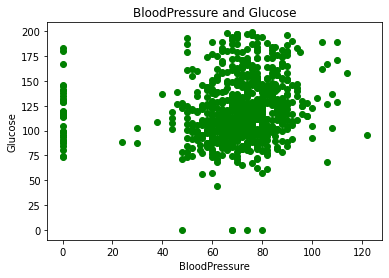

In [80]:
plt.scatter(BloodPressure, Glucose, color=['g'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure and Glucose')
plt.show()

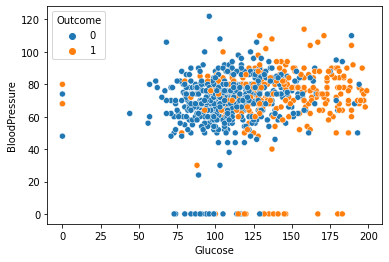

In [81]:
s_G_BP =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",hue="Outcome",data=df);

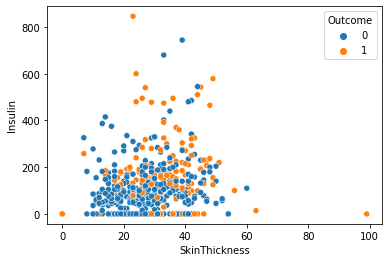

In [82]:
S_S_I =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",hue="Outcome",data= df);

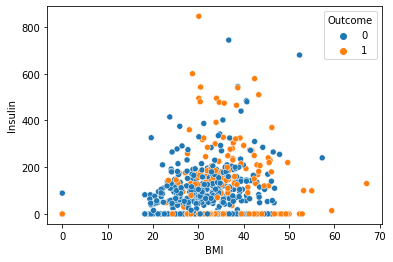

In [83]:
S_B_I =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

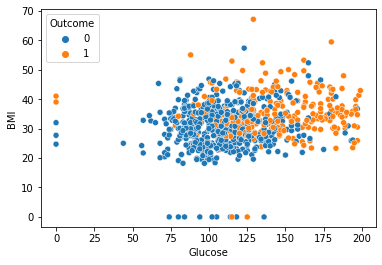

In [84]:
S_P_B = sns.scatterplot(x='Glucose', y = 'BMI', hue='Outcome',data = df)

In [85]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

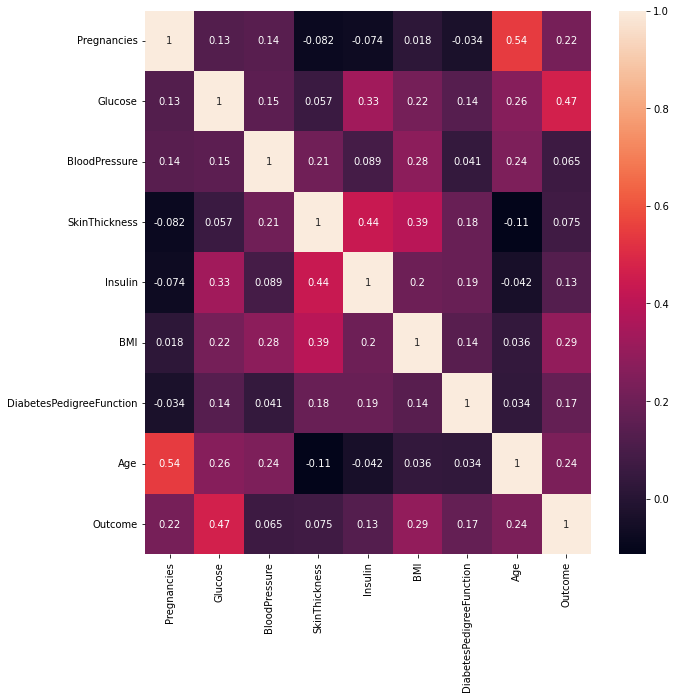

In [86]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [87]:
x = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

### splitting the data

In [88]:
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

### KNeighborsClassifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p = 2)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [90]:
x_train_prediction = model_knn.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.7850162866449512

In [91]:
x_test_prediction = model_knn.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
testing_data_accuracy

0.7467532467532467

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model_knn.predict(x))
cm

array([[436,  64],
       [107, 161]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y,model_knn.predict(x)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       500
           1       0.72      0.60      0.65       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.74       768
weighted avg       0.77      0.78      0.77       768



In [94]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


f1=0.65 auc=0.75 ap=0.72


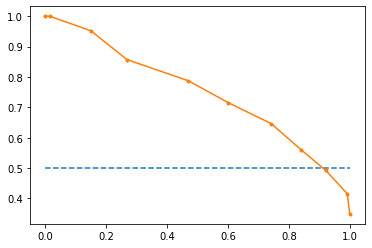

In [95]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

pr2 = model_knn.predict_proba(x)

pr2 = pr2[:, 1]

yhat = model_knn.predict(x)

precision, recall, thresholds = precision_recall_curve(y, pr2)

f1 = f1_score(y, yhat)

auc = auc(recall, precision)

ap = average_precision_score(y, pr2)
print('f1=%.2f auc=%.2f ap=%.2f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')


###  DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier(max_depth=5)
model_DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [97]:
model_DTC.score(x_train,y_train)

0.8452768729641694

In [98]:
model_DTC.score(x_test,y_test)

0.7792207792207793

#### Precision Recall Curve for Decission Tree Classifier

f1=0.73 auc=0.82 ap=0.80


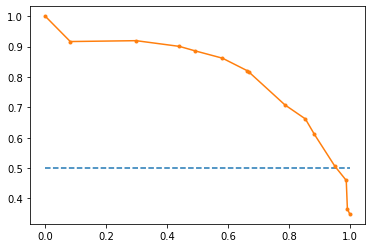

In [99]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

pr3 = model_DTC.predict_proba(x)

pr3 = pr3[:, 1]

yhat = model_DTC.predict(x)

precision, recall, thresholds = precision_recall_curve(y, pr3)

f1 = f1_score(y, yhat)

auc = auc(recall, precision)

ap = average_precision_score(y, pr3)
print('f1=%.2f auc=%.2f ap=%.2f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')

###  LogisticRegression

In [100]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()


In [101]:
model_LR.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
x_train_prediction = model_LR.predict(x_train)

In [103]:
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [104]:
training_data_accuracy

0.7850162866449512

In [105]:
x_test_prediction = model_LR.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
testing_data_accuracy

0.7532467532467533

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model_LR.predict(x))
cm

array([[445,  55],
       [115, 153]], dtype=int64)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y,model_LR.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
def analyze(grid_result):
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print()
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

In [109]:
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

# Logistic Regression Hyperparameter Result
analyze(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.7830769230769231
0.780 (+/-0.244) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777 (+/-0.250) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.780 (+/-0.244) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.783 (+/-0.238) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.777 (+/-0.248) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772 (+/-0.234) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.252) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724 (+/-0.207) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.251) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.689 (+/-0.201) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59    

## ROC curve

AUC: 0.838


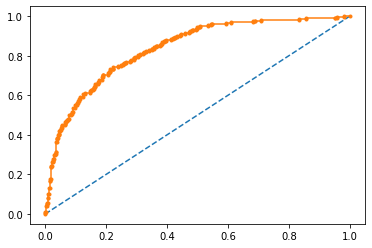

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pr1 = model_LR.predict_proba(x)

pr1 = pr1[:, 1]

auc = roc_auc_score(y, pr1)

print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y, pr1)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

#### Precision Recall Curve for Logistic Regression

f1=0.643 auc=0.727 ap=0.728


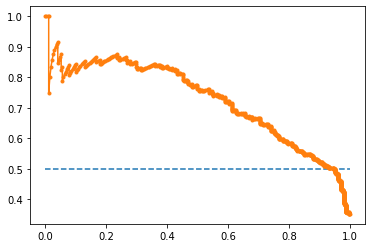

In [111]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

pr1 = model_LR.predict_proba(x)

pr1 = pr1[:, 1]

yhat = model_LR.predict(x)

precision, recall, thresholds = precision_recall_curve(y, pr1)

f1 = f1_score(y, yhat)

auc = auc(recall, precision)

ap = average_precision_score(y, pr1)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')

## Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=11)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=11)

In [113]:
model_RFC.score(x_train,y_train)

0.990228013029316

In [114]:
model_RFC.score(x_test,y_test)

0.7142857142857143

#### Precision Recall Curve for Random Forest

f1=0.905 auc=0.959 ap=0.950


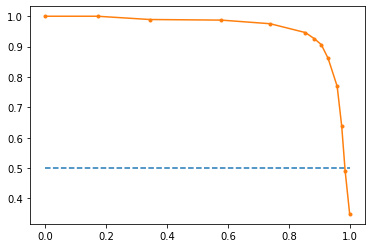

In [115]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

pr4 = model_RFC.predict_proba(x)

pr4 = pr4[:, 1]

yhat = model_RFC.predict(x)

precision, recall, thresholds = precision_recall_curve(y, pr4)

f1 = f1_score(y, yhat)

auc = auc(recall, precision)

ap = average_precision_score(y, pr4)

print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')

In [116]:
model = RandomForestClassifier(random_state=42)
# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

analyze(grid_result)

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
Accuracy : 0.7801302931596091
0.775 (+/-0.013) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.772 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.775 (+/-0.013) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.772 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.772 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.767 (+/-0.003) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.777 (+/-0.010) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.770 (+/-0.016) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.777 (+/-0.0

### Support Vector Classifier

In [117]:
from sklearn.svm import SVC 
model_svc = SVC(kernel='rbf',gamma='auto')
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [118]:
model_svc.score(x_train,y_train)

1.0

In [119]:
model_svc.score(x_test,y_test)

0.6493506493506493

#### Precision Recall Curve for support Vector machine